In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ugradio 
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['axes.linewidth'] = 3 #set the value globally
plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 22})

ImportError: cannot import name '_ccallback_c' from 'scipy._lib' (/home/global/lib/python3.6/site-packages/scipy/_lib/__init__.py)

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Load in Initial On/Off Data

In [223]:
data_on = np.load('Data/Raspberry_Pi/galactic_coords_online_raw.npy')
data_off = np.load('Data/Raspberry_Pi/galactic_coords_offline_raw.npy')

## Calculate the Average Power

In [224]:
freqs = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6)) /1e6 #we sampled with resolution of 2048 samples at 2.2 MHz

def calc_ave_power(data):
    """
    A function to calculate the average power of sampled data
    """
    fft = np.fft.fft(data)
    power = np.abs(fft)**2
    avg = np.mean(power,axis=0)
    
    return avg
    

In [225]:
avg_on = calc_ave_power(data_on)
avg_off = calc_ave_power(data_off)

## Plot Data

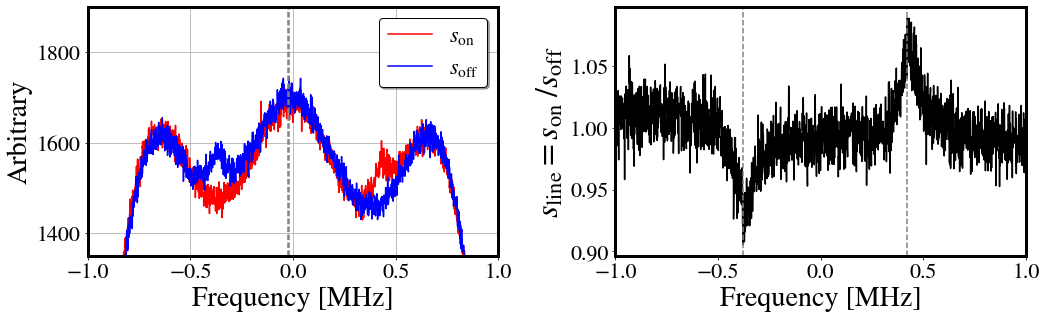

In [226]:
s_line = avg_on/avg_off
f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs,np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(freqs,np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
axes[0].axvline(freqs[np.argmax(np.fft.fftshift(avg_on))],0,2500, linestyle="--", color="gray")
axes[0].axvline(freqs[np.argmax(np.fft.fftshift(avg_off))],0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1350, 1900)
axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Frequency [MHz]", fontsize=28)
axes[0].set_ylabel("Arbitrary", fontsize=28)
axes[0].grid()
axes[0].legend(edgecolor="black", shadow=True)

axes[1].plot(freqs, np.fft.fftshift(avg_on/avg_off), color="black")
axes[1].set_xlim(-1,1)
axes[1].axvline(freqs[np.argmax(np.fft.fftshift(s_line))],0,2500, linestyle="--", color="gray")
axes[1].axvline(freqs[np.argmin(np.fft.fftshift(s_line))],0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Frequency [MHz]", fontsize=28)
axes[1].set_ylabel("$s_{\mathrm{line}} = s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=32)
f.tight_layout()
# plt.savefig("long_integration.pdf", dpi=300)
plt.show()



# Blackbody Callibration

In [43]:
sky_raw = np.load('Data/Raspberry_Pi/data2_on_raw.npy').reshape(-1,2048) #our data had 2048 samples
blackbody_raw = np.load('Data/Raspberry_Pi/data2_cal_raw.npy')

In [44]:
avg_sky = calc_ave_power(sky_raw)
avg_blackbody = calc_ave_power(blackbody_raw)

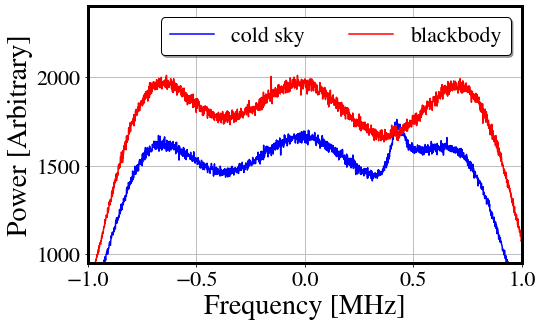

In [341]:

f, axes = plt.subplots(1,1, figsize=(8,5))

axes.plot(freqs,np.fft.fftshift(avg_sky),color="blue", label='cold sky')
axes.plot(freqs,np.fft.fftshift(avg_blackbody) ,color="red",label='blackbody')
# axes[0].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes.set_ylim(950, 2400)
axes.set_xlim(-1,1)
axes.set_xlabel("Frequency [MHz]", fontsize=28)
axes.set_ylabel("Power [Arbitrary]", fontsize=28)
axes.grid()
axes.legend(ncol=2, edgecolor="black", shadow=True)


# axes[1].plot(freqs, np.fft.fftshift(avg_on/avg_off), color="black")
# axes[1].set_xlim(-1,1)
# axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
# axes[1].set_xlabel("Frequency [MHz]")
# axes[1].set_ylabel("$s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=26)
f.tight_layout()
# plt.savefig("BlackBody_Callibration.pdf", dpi=300)
plt.show()

In [47]:
ΔT = (np.sum(np.fft.fftshift(avg_blackbody - avg_sky)) ) 

G = (300 / ΔT)* np.sum(avg_sky) #300 Kelvin for human blackbody
print("Gain: {0:0.4f}".format(G)) 

Gain: 1477.5505


In [49]:
# plt.plot(freqs, np.fft.fftshift(avg_blackbody - avg_sky)*G)

# Plot $s_{\mathrm{line}}$

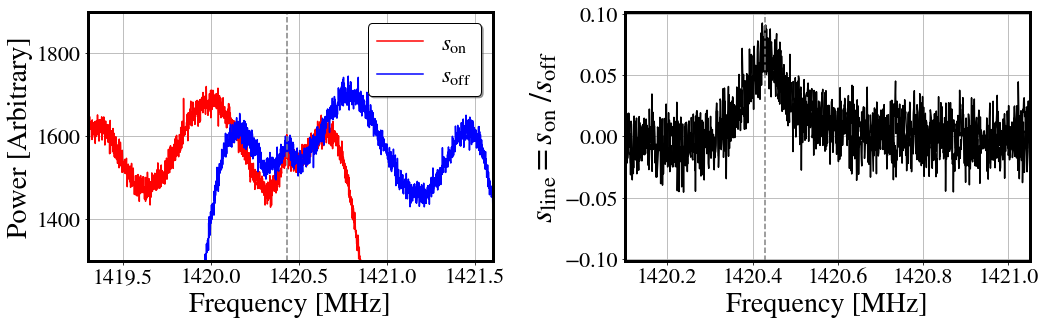

In [343]:
f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs + 1420, np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(freqs + 1420.8, np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
axes[0].axvline(1420.43,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1300, 1900)
axes[0].set_xlim(1419.3,1421.6)
axes[0].set_xlabel("Frequency [MHz]", fontsize=28)
# axes[0].set_ylabel("Temperature [K]", fontsize=28)
axes[0].grid()
axes[0].set_ylabel("Power [Arbitrary]", fontsize=28)

axes[0].legend(fontsize=23,edgecolor="black", shadow=True)


axes[1].plot(freqs + 1420, np.fft.fftshift(s_line - np.median(s_line)), color="black")
axes[1].plot(freqs + 1420.8, np.fft.fftshift(-(s_line- np.median(s_line))), color="black")
axes[1].axvline(1420.43,0,2500, linestyle="--", color="gray")
axes[1].set_xlim(1420.1,1421.05)
# axes[1].set_xlim(-1,1)
# axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].grid()
axes[1].set_xlabel("Frequency [MHz]", fontsize=28)
axes[1].set_ylabel("$s_{\mathrm{line}} = s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=32)
f.tight_layout()
plt.savefig("shape.pdf", dpi=300)
plt.show()

# Doppler Shift Calculations

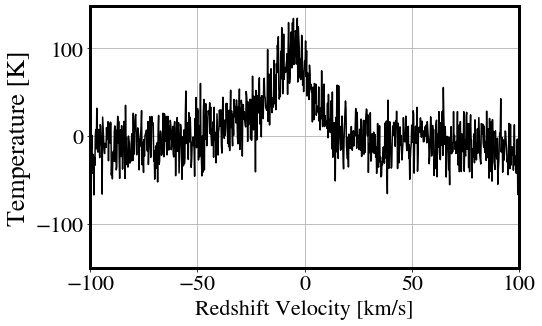

In [250]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,1, figsize=(8,5))

# axes[0].plot(velocity_on, np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
# axes[0].plot(velocity_off, np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
# # axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# # axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
# # axes[0].set_ylim(1500, 2000)
# # axes[0].set_xlim(-1,1)
# axes[0].set_xlabel("Redshift Velocity [km/s]")
# axes[0].set_ylabel("Temperature [K]")
# axes[0].grid()
# axes[0].legend(edgecolor="black", shadow=True)


axes.plot(velocity_on, np.fft.fftshift(s_line - np.median(s_line)) * G, color="black")
# axes.plot(velocity_off, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes.set_xlim(-100,100)
# axes.axvline(velocity_on[np.argmax(np.fft.fftshift(s_line - np.median(s_line)) * G)],0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes.set_xlabel("Redshift Velocity [km/s]")
axes.set_ylabel("Temperature [K]", fontsize=26)
axes.grid()
f.tight_layout()
plt.show()

In [254]:
v_21cm_uncorrected = velocity_on[np.argmax(np.fft.fftshift(s_line))]
print("We find that the 21 cm line is moving away from us at {0:0.3f} km/s".format(v_21cm_uncorrected))

We find that the 21 cm line is moving away from us at -3.457 km/s


In [255]:
RA, DEC = 6.45, 62.726 #RA, DEC for our observations
JD = 2459632.0472222
# JD = 2459632.3805556

correction = ugradio.doppler.get_projected_velocity(RA, DEC,JD).value / 1000
print("We have a velocity correction of {0:0.3f} km/s".format(correction))

We have a velocity correction of -17.004 km/s


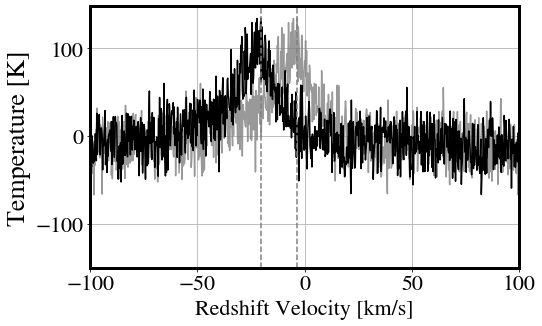

In [258]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,1, figsize=(8,5))

# axes[0].plot(velocity_on + correction, np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
# axes[0].plot(velocity_off + correction, np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
# # axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# # axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
# # axes[0].set_ylim(1500, 2000)
# # axes[0].set_xlim(-1,1)
# axes[0].set_xlabel("Redshift Velocity [km/s]")
# axes[0].set_ylabel("Temperature [K]")
# axes[0].grid()
# axes[0].legend(edgecolor="black", shadow=True)


axes.plot(velocity_on, np.fft.fftshift(s_line - np.median(s_line)) * G, alpha=0.8, color="gray")
axes.plot(velocity_on + correction, np.fft.fftshift(s_line - np.median(s_line)) * G, color="black")
# axes[1].plot(velocity_off + correction, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes.set_xlim(-100,100)
axes.axvline(v_21cm_uncorrected + correction,0,2500, linestyle="--", color="gray")
axes.axvline(v_21cm_uncorrected,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes.set_xlabel("Redshift Velocity [km/s]")
axes.set_ylabel("Temperature [K]", fontsize=26)
axes.grid()
f.tight_layout()
plt.show()

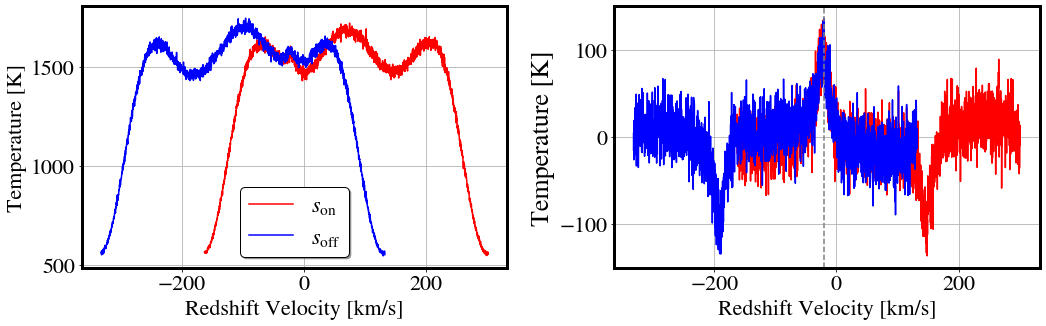

In [56]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(velocity_on + correction, np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(velocity_off + correction, np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
# axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Redshift Velocity [km/s]")
axes[0].set_ylabel("Temperature [K]")
axes[0].grid()
axes[0].legend(edgecolor="black", shadow=True)

axes[1].plot(velocity_on + correction, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(velocity_off + correction, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
# axes[1].set_xlim(-100,100)
axes[1].axvline(velocity_on[np.argmax(np.fft.fftshift(s_line - np.median(s_line)) * G)] + correction,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Redshift Velocity [km/s]")
axes[1].set_ylabel("Temperature [K]", fontsize=26)
axes[1].grid()
f.tight_layout()
plt.show()

In [57]:
v_21cm = velocity_on[np.argmax(np.fft.fftshift(s_line))] + correction
print("We find that the 21 cm line is actually moving away from us at {0:0.3f} km/s".format(v_21cm))

We find that the 21 cm line is actually moving away from us at -20.461 km/s


# Fitting Data

In [259]:
y_data_fit = np.fft.fftshift(s_line - np.median(s_line)) * G
y_data_fit = y_data_fit[1000:]
x_data_fit = velocity_on + correction
x_data_fit = x_data_fit[1000:]

x_data_freqs = freqs[1000:] + 1420

In [260]:
x_data_freqs

array([1419.97421875, 1419.97529297, 1419.97636719, ..., 1421.09677734,
       1421.09785156, 1421.09892578])

### First we try a single Gaussian

In [261]:
fit_params_on = ugradio.gauss.gaussfit(x_data_fit, y_data_fit, amp=200, avg=-20, sig=25)
print("Fitting Params", fit_params_on['amp'],fit_params_on['avg'],fit_params_on['sig'], "\n")


chisq_r_s = []
for i in range(1):
    ys = np.fft.fftshift(s_line - np.median(s_line)) * G
    xs = velocity_on + correction
    chisq_r_s.append(np.sum(np.abs(y_data_fit - ugradio.gauss.gaussval(x_data_fit, **fit_params_on))**2) / (y_data_fit.size - 3) / np.std(y_data_fit[:100])**2)
print("reduced χ^2 =",np.average(chisq_r_s))

Fitting Params [90.09121861] [-23.46724012] [10.16051424] 

reduced χ^2 = 1.2281889157007864


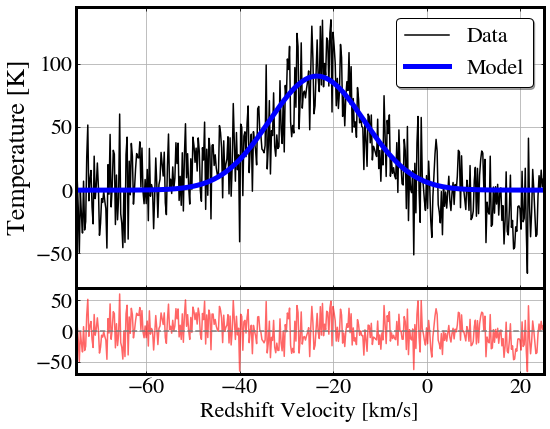

In [262]:
# definitions for the axes 
left, width = 0.1, 0.65 
bottom, height = 0.1, 0.65 
spacing = 0.0

rect_center = [left, bottom, width, height]
rect_bottomx = [left, -bottom + spacing, width, 0.2] 

# start with a rectangular Figure
fig = plt.figure(figsize=(10, 6)) 
# fig.suptitle("Posterior of MCMC")
ax_center = plt.axes(rect_center) 
ax_center.tick_params(direction='in', top=True, right=True) 
ax_bottomx = plt.axes(rect_bottomx)
ax_bottomx.tick_params(direction='in') 

# the center plot:
y_model_one_peak = ugradio.gauss.gaussval(x_data_fit, **fit_params_on)
ax_center.plot(x_data_fit, y_data_fit, color="black", label="Data")
ax_center.plot(x_data_fit, y_model_one_peak, color="blue",linewidth=5, label="Model")
ax_center.legend(edgecolor="black", shadow=True)
ax_center.set_ylabel("Temperature [K]", fontsize=26)
ax_center.grid()
ax_center.set_xlim(-75, 25)


#the residual plot:
residual_one_peak = y_data_fit - ugradio.gauss.gaussval(x_data_fit, **fit_params_on)
ax_bottomx.plot(x_data_fit, residual_one_peak, alpha=0.6,color="red",label="Residuals")
ax_bottomx.axhline(0, color="gray", linestyle="--")
ax_bottomx.set_xlabel("Redshift Velocity [km/s]")
ax_bottomx.set_ylim(-70,70)
ax_bottomx.grid()
ax_bottomx.set_xlim(-75, 25)
plt.show()


In [263]:
ys = np.fft.fftshift(s_line - np.median(s_line)) * G
xs = velocity_on + correction

chisq = []
amp_1 = np.linspace(fit_params_on['amp'][0] - 100, fit_params_on['amp'][0] + 100, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      [amp_1[i]],
                                                      fit_params_on['avg'],
                                                      fit_params_on['sig']))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_amp_1 = chisq - np.min(chisq)



# ---------------------------------------------------------------------------------------------

chisq = []
avg_1 = np.linspace(fit_params_on['avg'][0] - 10, fit_params_on['avg'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      fit_params_on['amp'],
                                                      [avg_1[i]],
                                                      fit_params_on['sig']))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_avg_1 = chisq - np.min(chisq)


# ---------------------------------------------------------------------------------------------

chisq = []
sig_1 = np.linspace(fit_params_on['sig'][0] - 10, fit_params_on['sig'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      fit_params_on['amp'],
                                                      fit_params_on['avg'],
                                                      [sig_1[i]]))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_sig_1 = chisq - np.min(chisq)



In [264]:
params = np.array([amp_1, avg_1, sig_1])
names = np.array(["Peak Temperature [K]",
                 "Peak Velocity [km/s]",
                 "Peak Std [km/s]"])
chis = np.array([chisq_amp_1,  chisq_avg_1,  chisq_sig_1])


def give_errors(chis):
    
    for i in range(3):
        for j in range(2):
            upper_bound = np.max([np.where(chis <= 4)])
            lower_bound = np.min([np.where(chis <= 4)])
            errors = [int(lower_bound), int(upper_bound)]
            
    return errors


final_errors = np.zeros((3,2))
for i in range(3):
    errors = give_errors(chis[i])
    upper_bound = errors[1]
    lower_bound = errors[0]
    final_errors[i] = [params[i][lower_bound] - params[i][np.argmin(chis[i])],
                         params[i][upper_bound] - params[i][np.argmin(chis[i])]]

        

final_errors = np.mean(np.abs(final_errors), axis=1)
        

for i in range(3):
    print("\nWe find", names[i], "to be {0:0.2f} +\- {1:0.2f}".format(
                                                                    params[i][np.argmin(chis[i])], 
                                                                    final_errors[i]))


We find Peak Temperature [K] to be 90.19 +\- 4.50

We find Peak Velocity [km/s] to be -23.46 +\- 0.71

We find Peak Std [km/s] to be 10.15 +\- 0.64


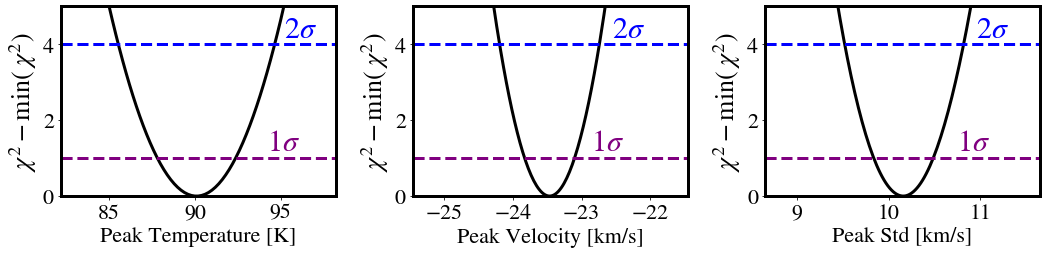

In [265]:

f, axes = plt.subplots(1,3, figsize=(15, 4))

for i in range(3):
    axes[i].plot(params[i], chis[i], color="black", linewidth=3)
    axes[i].set_xlim(params[i][np.argmin(chis[i])] - 8, params[i][np.argmin(chis[i])] + 8)
    
    if i == 0:
        axes[i].text(params[i][np.argmin(chis[i])] + 4, 1.2, "$1 \sigma$", color="purple", fontsize=30)
        axes[i].text(params[i][np.argmin(chis[i])] + 5, 4.2, "$2 \sigma$", color="blue", fontsize=30)

    elif i == 1:
        axes[i].set_xlim(params[i][np.argmin(chis[i])] - 2, params[i][np.argmin(chis[i])] + 2)
        axes[i].text(params[i][np.argmin(chis[i])] + 0.6, 1.2, "$1 \sigma$", color="purple", fontsize=30)
        axes[i].text(params[i][np.argmin(chis[i])] + 0.9, 4.2, "$2 \sigma$", color="blue", fontsize=30)

    elif i == 2:
        axes[i].set_xlim(params[i][np.argmin(chis[i])] - 1.5, params[i][np.argmin(chis[i])] + 1.5)
        axes[i].text(params[i][np.argmin(chis[i])] + 0.6, 1.2, "$1 \sigma$", color="purple", fontsize=30)
        axes[i].text(params[i][np.argmin(chis[i])] + 0.8, 4.2, "$2 \sigma$", color="blue", fontsize=30)
    


    axes[i].set_ylabel("$\\chi^2 - \mathrm{min}(\; \chi^2)$", fontsize=26)
    axes[i].set_xlabel(names[i])
    axes[i].axhline(y=4, color="blue", linestyle="--", linewidth=3, label="$2 \sigma$")
    axes[i].axhline(y=1, color="purple", linestyle="--", linewidth=3, label="$1 \sigma$")
    axes[i].set_ylim(0,5)


f.tight_layout()
# plt.savefig("Chi_Squared.pdf", dpi=300)
plt.show()

### Now we fit a double Gaussian

In [266]:
fit_params_on = ugradio.gauss.gaussfit(x_data_fit, y_data_fit, amp=[20,100], avg=[-50,-5], sig=[25,15])
print("Fitting Params", fit_params_on['amp'],fit_params_on['avg'],fit_params_on['sig'], "\n")


chisq_r = []
for i in range(10):
    ys = np.fft.fftshift(s_line - np.median(s_line)) * G
    xs = velocity_on + correction
    chisq_r.append(np.sum(np.abs(y_data_fit - ugradio.gauss.gaussval(x_data_fit, **fit_params_on))**2) / (y_data_fit.size - 3) / np.std(y_data_fit[:100])**2)
print("reduced χ^2 = {0:0.3f}".format(np.average(chisq_r)))


Fitting Params [21.72713329 94.6752067 ] [-44.4786478  -22.02972966] [9.29652271 8.20124762] 

reduced χ^2 = 1.185


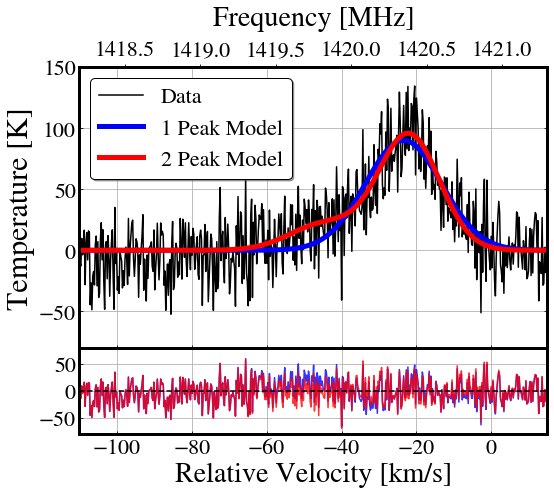

In [316]:
# definitions for the axes 
left, width = 0.1, 0.65 
bottom, height = 0.1, 0.65 
spacing = 0.0

rect_center = [left, bottom, width, height]
rect_bottomx = [left, -bottom + spacing, width, 0.2] 

# start with a rectangular Figure
fig = plt.figure(figsize=(10, 6)) 
# fig.suptitle("Posterior of MCMC")
ax_center = plt.axes(rect_center) 
ax_center.tick_params(direction='in', top=True, right=True) 
ax_bottomx = plt.axes(rect_bottomx)
ax_bottomx.tick_params(direction='in') 

# the center plot:
# y_model_one_peak
y_model_two_peak = ugradio.gauss.gaussval(x_data_fit, **fit_params_on)
ax_center.plot(x_data_fit, y_data_fit, color="black", label="Data")
ax_center.plot(x_data_fit, y_model_one_peak, color="blue",linewidth=5, label="1 Peak Model")
ax_center.plot(x_data_fit, y_model_two_peak, color="red",linewidth=5, label="2 Peak Model")
ax_center.legend(edgecolor="black", shadow=True)
ax_center.set_ylabel("Temperature [K]", fontsize=30)
# ax_center.yaxis.set_label_coords(-0.1,1.02)
ax_center.grid()
ax_center.set_xlim(-110, 15)
ax_center.set_ylim(-80, 150)


#the residual plot:
# residual_one_peak
residual_two_peak = y_data_fit - ugradio.gauss.gaussval(x_data_fit, **fit_params_on)
ax_bottomx.plot(x_data_fit, residual_one_peak, alpha=0.8,color="blue",label="Residuals")
ax_bottomx.plot(x_data_fit, residual_two_peak, alpha=0.8,color="red",label="Residuals")
ax_bottomx.axhline(0, color="black", linestyle="--")
ax_bottomx.set_xlabel("Relative Velocity [km/s]", fontsize=28)
ax_bottomx.set_ylim(-80,80)
ax_bottomx.grid()
ax_bottomx.set_xlim(-110, 15)
# plt.show()

ax_center_top = ax_center.twiny()
ax_center_top.xaxis.set_ticks_position('top')
ax_center_top.plot(freqs[1000:] + 1420, np.zeros(len(x_data_freqs)), linewidth=0.01, alpha=0, color="white")
ax_center_top.set_xlim(1418.2, 1421.3)
ax_center_top.set_xlabel("Frequency [MHz]", fontsize=28, labelpad = 15)
# ax_center_top.axvline(1420.4,-250,250, linestyle="--", color="gray")

# fig.subplots_adjust(bottom=-10) # or whatever
fig.subplots_adjust(bottom=-100)

fig.savefig("model_comparison_3.pdf",bbox_inches="tight", dpi=300)
# plt.constrain_layout()

plt.show()



### That's a better chi squared value! Let's find errors now

In [268]:
ys = np.fft.fftshift(s_line - np.median(s_line)) * G
xs = velocity_on + correction

chisq = []
amp_1 = np.linspace(fit_params_on['amp'][0] - 100, fit_params_on['amp'][0] + 100, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      [amp_1[i],fit_params_on['amp'][1]],
                                                      fit_params_on['avg'],
                                                      fit_params_on['sig']))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_amp_1 = chisq - np.min(chisq)


chisq = []
amp_2 = np.linspace(fit_params_on['amp'][1] - 100, fit_params_on['amp'][1] + 100, 1000)
for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      [fit_params_on['amp'][0],amp_2[i]],
                                                      fit_params_on['avg'],
                                                      fit_params_on['sig']))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_amp_2 = chisq - np.min(chisq)

# ---------------------------------------------------------------------------------------------

chisq = []
avg_1 = np.linspace(fit_params_on['avg'][0] - 10, fit_params_on['avg'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      fit_params_on['amp'],
                                                      [avg_1[i], fit_params_on['avg'][1]],
                                                      fit_params_on['sig']))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_avg_1 = chisq - np.min(chisq)


chisq = []
avg_2 = np.linspace(fit_params_on['avg'][1] - 10, fit_params_on['avg'][1] + 10, 1000)
for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      fit_params_on['amp'],
                                                      [fit_params_on['avg'][0],avg_2[i]],
                                                      fit_params_on['sig']))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_avg_2 = chisq - np.min(chisq)

# ---------------------------------------------------------------------------------------------

chisq = []
sig_1 = np.linspace(fit_params_on['sig'][0] - 10, fit_params_on['sig'][0] + 10, 1000)

for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      fit_params_on['amp'],
                                                      fit_params_on['avg'],
                                                      [sig_1[i], fit_params_on['sig'][1]]))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_sig_1 = chisq - np.min(chisq)


chisq = []
sig_2 = np.linspace(fit_params_on['sig'][1] - 10, fit_params_on['sig'][1] + 10, 1000)
for i in range(1000):
    chisq.append(np.sum(np.abs(y_data_fit - 
                               ugradio.gauss.gaussval(x_data_fit,
                                                      fit_params_on['amp'],
                                                      fit_params_on['avg'],
                                                      [fit_params_on['sig'][0], sig_2[i]]))**2) / np.std(y_data_fit[:100])**2)
    
chisq = np.array(chisq)

chisq_sig_2 = chisq - np.min(chisq)


In [269]:
params = np.array([amp_1, amp_2, avg_1, avg_2, sig_1, sig_2]).reshape(3,2,-1)
names = np.array(["1st Peak Temperature [K]", "2nd Peak Temperature [K]",
         "1st Peak Velocity [km/s]", "2nd Peak Velocity [km/s]",
         "1st Peak Std [km/s]", "2nd Peak Std [km/s]"]).reshape(3,2)
chis = np.array([chisq_amp_1, chisq_amp_2, chisq_avg_1, chisq_avg_2, chisq_sig_1, chisq_sig_2]).reshape(3,2,-1)


def give_errors(chis):
    
    for i in range(3):
        for j in range(2):
            upper_bound = np.max([np.where(chis <= 4)])
            lower_bound = np.min([np.where(chis <= 4)])
            errors = [int(lower_bound), int(upper_bound)]
            
    return errors


final_errors = np.zeros((3,2,2))
for i in range(3):
    for j in range(2):
        errors = give_errors(chis[i,j])
        upper_bound = errors[1]
        lower_bound = errors[0]
        final_errors[i,j] = [params[i, j][lower_bound] - params[i, j][np.argmin(chis[i, j])],
                             params[i, j][upper_bound] - params[i, j][np.argmin(chis[i, j])]]
        
        

final_errors = np.mean(np.abs(final_errors), axis=2)
        

for i in range(3):
    for j in range(2):
        print("\nWe find", names[i,j], "to be {0:0.2f} +\- {1:0.2f}".format(
                                                                    params[i, j][np.argmin(chis[i, j])], 
                                                                    final_errors[i,j]))


We find 1st Peak Temperature [K] to be 21.83 +\- 4.70

We find 2nd Peak Temperature [K] to be 94.58 +\- 4.90

We find 1st Peak Velocity [km/s] to be -44.47 +\- 2.89

We find 2nd Peak Velocity [km/s] to be -22.02 +\- 0.61

We find 1st Peak Std [km/s] to be 9.31 +\- 2.28

We find 2nd Peak Std [km/s] to be 8.21 +\- 0.51


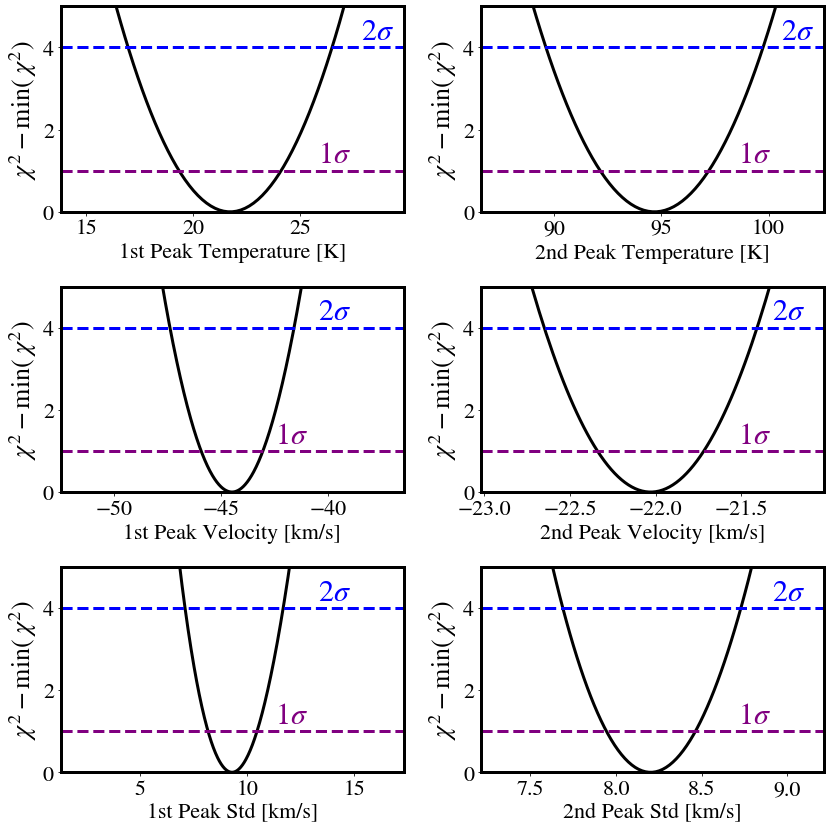

In [315]:

f, axes = plt.subplots(3, 2, figsize=(12, 12))

for i in range(3):
    for j in range(2):
        axes[i,j].plot(params[i, j], chis[i, j], color="black", linewidth=3)
        axes[i,j].set_xlim(params[i, j][np.argmin(chis[i, j])] - 8, params[i, j][np.argmin(chis[i, j])] + 8)
       
        if i == 1 and j == 1:
            axes[i,j].set_xlim(params[i, j][np.argmin(chis[i, j])] - 1, params[i, j][np.argmin(chis[i, j])] + 1)
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 0.5, 1.2, "$1 \sigma$", color="purple", fontsize=30)
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 0.7, 4.2, "$2 \sigma$", color="blue", fontsize=30)

        elif i == 2 and j == 1:
            axes[i,j].set_xlim(params[i, j][np.argmin(chis[i, j])] - 1, params[i, j][np.argmin(chis[i, j])] + 1)
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 0.5, 1.2, "$1 \sigma$", color="purple", fontsize=30)
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 0.7, 4.2, "$2 \sigma$", color="blue", fontsize=30)
        elif i == 0:
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 4, 1.2, "$1 \sigma$", color="purple", fontsize=30)
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 6, 4.2, "$2 \sigma$", color="blue", fontsize=30)
        else:
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 2, 1.2, "$1 \sigma$", color="purple", fontsize=30)
            axes[i,j].text(params[i, j][np.argmin(chis[i, j])] + 4, 4.2, "$2 \sigma$", color="blue", fontsize=30)


        axes[i,j].set_ylabel("$\\chi^2 - \mathrm{min}(\; \chi^2)$", fontsize=26)
        axes[i,j].set_xlabel(names[i, j])
        axes[i,j].axhline(y=4, color="blue", linestyle="--", linewidth=3, label="$2 \sigma$")
        axes[i,j].axhline(y=1, color="purple", linestyle="--", linewidth=3, label="$1 \sigma$")
        axes[i,j].set_ylim(0,5)
        

f.tight_layout()
plt.savefig("Chi_Squared.pdf", dpi=300)
plt.show()

In [137]:
# plt.figure(figsize=(9,6))
# plt.plot(x_data_fit, y_data_fit, color="black", label="Data")
# plt.plot(x_data_fit, y_data_fit - ugradio.gauss.gaussval(x_data_fit, **fit_params_on), 
#          color="red", alpha=0.6, label="Residuals")
# plt.plot(x_data_fit, ugradio.gauss.gaussval(x_data_fit, **fit_params_on), color="blue",linewidth=6, label="Model")

# plt.legend(edgecolor="black", shadow=True)
# plt.xlabel("Redshift Velocity [km/s]")
# plt.ylabel("Temperature [K]", fontsize=26)
# plt.grid()
# # plt.savefig("double_peak.pdf", dpi=300)
# plt.show()


# Observations & Coordinates

In [291]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Rectangle

In [293]:
cal_lat, cal_lon = 37.8715, 122.2730
RA_z = ugradio.timing.lst(jd = 2459632.0472222)
DEC_z = cal_lat

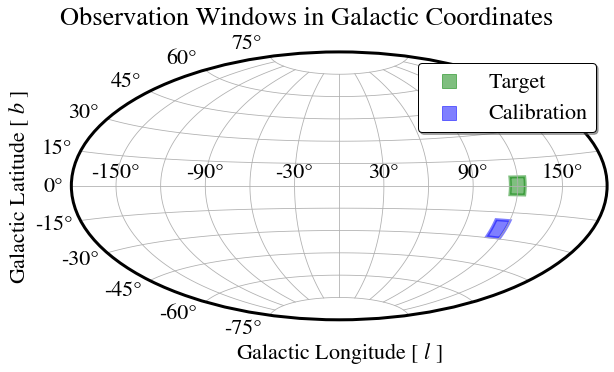

In [296]:
dg = u"\N{DEGREE SIGN}"

def plot_FOV(ax, RA, DEC, color, label):
    
    FOV = (10 * (np.pi/180))/ 2 #set by the telescope. We have a 10 degree field of view
    
    xarr = [RA]
    yarr = [DEC]

    eq = SkyCoord(xarr[:], yarr[:], unit=u.deg)
    gal = eq.galactic

    ax.scatter([],[],alpha=0.5,marker="s",s=200,color=color, label=label)
    ax.add_patch(Rectangle((gal.l.wrap_at('180d').radian - FOV, gal.b.radian - FOV),FOV*2 , FOV*2,
                 edgecolor = color,
                 facecolor = color,
                 alpha=0.5,
                 fill=True,
                 lw=3))
    

f = plt.figure(figsize=(9,5.5))

ax = plt.subplot(111, projection='aitoff')
ax.grid(True)

plot_FOV(ax, RA, DEC, color="green", label="Target")
plot_FOV(ax, RA_z, DEC_z, color="blue", label="Calibration")

ax.set_xticklabels(["-150"+dg," ", "-90"+dg, " ","-30"+dg, " ","30"+dg, " ","90"+dg," ", "150"+dg])
ax.set_xlabel("Galactic Longitude [ $l$ ]", labelpad=20)
ax.set_ylabel("Galactic Latitude [ $b$ ]")
ax.legend(edgecolor="black", shadow=True)
f.suptitle("Observation Windows in Galactic Coordinates")
f.tight_layout()
plt.savefig("Observing_Windows.pdf", dpi=300)
plt.show()

In [64]:
ugradio.gauss.gaussval??